<a href="https://colab.research.google.com/github/acesanu/Heart_diseases_prediction/blob/main/Heart_Disease_Prediction_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction.

** Coronary Artery Disease**

1) It refers to the narrowing or blockage of the coronary arteries, usually caused by the build-up of cholestrol and fatty deposits(called plaques) on the inner walls of the arteries.
2) These plaques can restrict blood flow to the heart muscle by physically clogging the artery or by causing abnormal artery tone and function.
3) This can cause chest pain called Angina. When one or more of the coronary arteries are completely blocked, a heart attack may occur.



In [ ]:
# Installing & Importing Libraries
!pip install -q datascience       # Package that is required by pandas profiling
!pip install -q pandas-profiling  # Toolbox for Generating Statistics Report
!pip install -q yellowbrick       # Toolbox for Measuring Machine Performance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [ ]:
# Upgrading Libraries
!pip install -q -- upgrade pandas-profiling
!pip install -q -- upgrade yellowbrick

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
# Importing Libraries - For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Scientific Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action="ignore")

<ipython-input-3-5d85bd80d220>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
LINK = 'https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Healthcare/Heart%20Disease%20Diagnosis/Data/heart_disease.csv'

data = pd.read_csv(filepath_or_buffer = LINK, encoding = 'latin1')
print("Data Shape: ", data.shape)
data.head()

Data Shape:  (366, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,typical anginia,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [ ]:
# Data Description - In this section we will get information about the data and see some observations.

print('Described Column Length:', len(data.describe().columns))
data.describe()

Described Column Length: 13


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,366.000000,366.000000,366.000000,348.000000,366.000000,366.000000,339.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,54.210383,0.680328,131.562842,247.568966,0.139344,0.508197,149.401180,0.330601,1.068306,1.393443,0.778689,2.349727,0.532787
std,9.043396,0.466988,16.987349,51.950856,0.346779,0.522049,21.964161,0.471074,1.203138,0.613421,1.066390,0.585756,0.499607
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.250000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,275.500000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observations:
1) On Average there are patients of age 54.
2) 25% of patients have age <= to 47 while 50% and 75% of patients have age <= to 55 and 61 respectively.
3) On average patients have resting blood pressure of 131.56 mmHg.
4) 25% of patients having resting blood pressure <= 120 mmHg while 50% and 75% of patients have resting blood pressure of <= 130 mmHg and <= 140 mmHg respectively.
5) On average patients have cholestrol of 247.56 mg/dl.
6) 25% of patients have cholestrol <= 212 mg/dl while 50% and 75% of patients have cholestrol <= 243 mg/dl and <= 275 mg/df respectively.
7) On average patients have max heart rate achieved at 149.4.
8) 25% of patients have max heart rate achieved <= 133.5 bpm while 50% and 75% of patients have max heart rate achieved <= 152 bpm nd <= 165 bpm respectively.
9) On average patients have ST depression of unit value.
10) 25% of patients have no ST depression while 50% and 75% of patients have ST depression <= 0.8 and <= 1.8 respectively.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      366 non-null    int64  
 1   sex                      366 non-null    int64  
 2   chest_pain_type          366 non-null    object 
 3   resting_blood_pressure   366 non-null    int64  
 4   cholesterol              348 non-null    float64
 5   fasting_blood_sugar      366 non-null    int64  
 6   rest_ecg                 366 non-null    int64  
 7   max_heart_rate_achieved  339 non-null    float64
 8   exercise_induced_angina  366 non-null    int64  
 9   st_depression            366 non-null    float64
 10  st_slope                 366 non-null    int64  
 11  num_major_vessels        366 non-null    int64  
 12  thalassemia              366 non-null    int64  
 13  target                   366 non-null    int64  
dtypes: float64(3), int64(10), 

Observation:
1) we can see that features like cholestrol, max_heart_rate_achieved contains missing values.
2) There are 14 features out of which 3 are float, 10 are integer and 1 is of object type.



## Data Pre-Processing.

Identification & Handling of Missing Data.
Null Data Identification & Handling.

Before handling Null Data.

In [ ]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals=4) * 100
null_frame.transpose()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
Null Frequency,0.0,0.0,0.0,0.0,18.00,0.0,0.0,27.00,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,4.92,0.0,0.0,7.38,0.0,0.0,0.0,0.0,0.0,0.0


Observation:
1) Feature
  a) Problem -> Action Required.
2) Cholestrol
  b) Missing Information(18) -> Replace with Median Value.
3) max_heart_rate_achieved
  c) Missing Information(27) -> Replace with Median Value.

In [ ]:
# Performing Operations
data['cholesterol'] = data['cholesterol'].replace(np.nan, data['cholesterol'].median())
data['max_heart_rate_achieved'] = data['max_heart_rate_achieved'].replace(np.nan, data['max_heart_rate_achieved'].median())

In [ ]:
# After handling Null Data
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequecny'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
Null Frequecny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observation - We can see that we have rid of all null values successfully.

In [ ]:
# Identification & Handling of Redundant Rows
# Before Handling Duplicate Rows
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

Contains Redundant Records?: True
Duplicate Count: 41


Observation - We can see that there are redundant records present in the data.

In [ ]:
# Performing Operations
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data.drop_duplicates(inplace = True)

after_shape = data.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals=2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (366, 14)
Data Shape [After]: (325, 14)
Drop Ratio: 11.0 %


In [ ]:
# After Handling Duplicate Rows
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


Observations: We have successfully dropped redundant records.

In [ ]:
# Identification & Handling of Redundant Features
# For handling duplicate features we have created a custom function to identify duplicacy in features with differnet name but similar values.

def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
print(duplicate_cols(data))

None


Observation: It turns out that there aren't any duplicate columns in features.

In [ ]:
# Identification & Handling of Inconsistent Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 363
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      325 non-null    int64  
 1   sex                      325 non-null    int64  
 2   chest_pain_type          325 non-null    object 
 3   resting_blood_pressure   325 non-null    int64  
 4   cholesterol              325 non-null    float64
 5   fasting_blood_sugar      325 non-null    int64  
 6   rest_ecg                 325 non-null    int64  
 7   max_heart_rate_achieved  325 non-null    float64
 8   exercise_induced_angina  325 non-null    int64  
 9   st_depression            325 non-null    float64
 10  st_slope                 325 non-null    int64  
 11  num_major_vessels        325 non-null    int64  
 12  thalassemia              325 non-null    int64  
 13  target                   325 non-null    int64  
dtypes: float64(3), int64(10), 

Observation: There is no need to change the type of data types as features have been pre-labelled with encoding.

# Handling Typos.
1) In this section we will correct the value of labels which were incorrectly typed during data recording.
2) As we have only one categorical feature left with labels, we will observe if the values contains any typos.

In [ ]:
data['chest_pain_type'].unique()

array(['asymptomatic', 'non-anginal pain', 'atypical angina',
       'typical anginia', 'typical angina'], dtype=object)

Observation: We can see that label typical angina was incorrectly typed as typical anginia.

In [ ]:
# Performing Correction - Before we will be replacing the given pattern i.e typical anginia with the replacement value i.e typical angina.
data['chest_pain_type'] = data['chest_pain_type'].str.replace(pat = 'typical anginia', repl = 'typical angina')

Observation: We have successfully handled typo in our data.

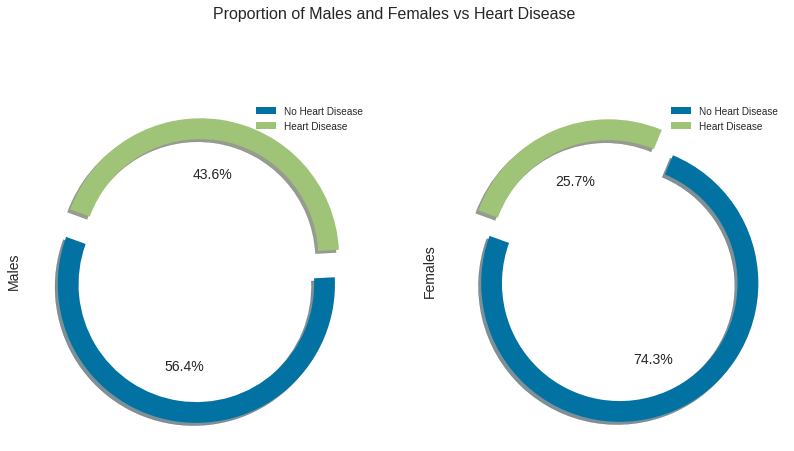

In [ ]:
# Exploratory Data Analysis
# Question 1: What is the proportion of males and females having heart disease or not?

males_data = data[data['sex'] == 1]
females_data = data[data['sex'] == 0]

figure = plt.figure(figsize = [12,10])
plt.subplot(1,2,1)
space = np.ones(2)/10
males_data['target'].value_counts().plot(kind= 'pie', explode= space, fontsize=14, autopct= '%3.1f%%', wedgeprops = dict(width= 0.15),
                                         shadow= True, startangle= 160, figsize= [13.66, 7.68], legend= True, labels = ['',''])
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.ylabel('Males', size=14)

plt.subplot(1,2,2)
space = np.ones(2)/10
females_data['target'].value_counts().plot(kind='pie', explode= space, fontsize= 14, autopct= '%3.1f%%', wedgeprops = dict(width=0.15),
                                           shadow = True, startangle=160, figsize = [13.66, 7.68], legend = True, labels = ['',''])
plt.legend(['No Heart Disease','Heart Disease'])
plt.ylabel('Females', size=14)
plt.suptitle('Proportion of Males and Females vs Heart Disease', size = 16)
plt.show()

Observations:
1) Around 56% of males don't have heart disease while ~44% of male patients have any heart disease.
2) Around 74% of female patients don't have heart disease while ~26% of female patients have any heart disease.

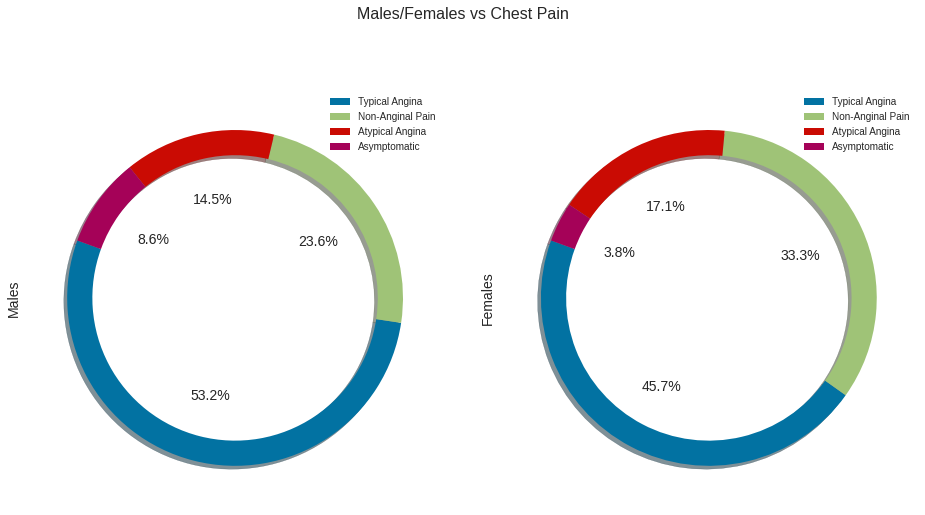

In [ ]:
# Question 2: What is the proportion of males and females having different type of chest pain?

males_data = data[data['sex'] == 1]
females_data = data[data['sex'] == 0]

figure = plt.figure(figsize= [12,10])
plt.subplot(1,2,1)
space = np.ones(4)/10
males_data['chest_pain_type'].value_counts().plot(kind='pie',fontsize=14, autopct= '%3.1f%%', wedgeprops = dict(width = 0.15),
                                                  shadow= True, startangle= 160, figsize= [13.66, 7.68], legend = True, labels = ['','','',''])
plt.legend(['Typical Angina','Non-Anginal Pain','Atypical Angina','Asymptomatic'])
plt.ylabel('Males', size= 14)

plt.subplot(1,2,2)
space = np.ones(4)/10
females_data['chest_pain_type'].value_counts().plot(kind='pie', fontsize=14, autopct= '%3.1f%%', wedgeprops= dict(width=0.15),
                                                    shadow = True, startangle = 160, figsize= [13.66, 7.68], legend = True, labels = ['','','',''])
plt.legend(['Typical Angina', 'Non-Anginal Pain','Atypical Angina','Asymptomatic'])
plt.ylabel('Females', size=14)
plt.suptitle('Males/Females vs Chest Pain', size= 16)
plt.tight_layout(pad = 3.0)
plt.show()


Question 3: What is the frequency of patients corresponding to the slope of the peak exercise ST segment?

1) ST segment depression(horizontal or downsloping, upsloping) is the most reliable indicator of exercise-induced ischaemia.
2) Ischaemia is a restriction in blood supply to tissues, causing a shortage of oxygen that is needed for cellular metabolism.

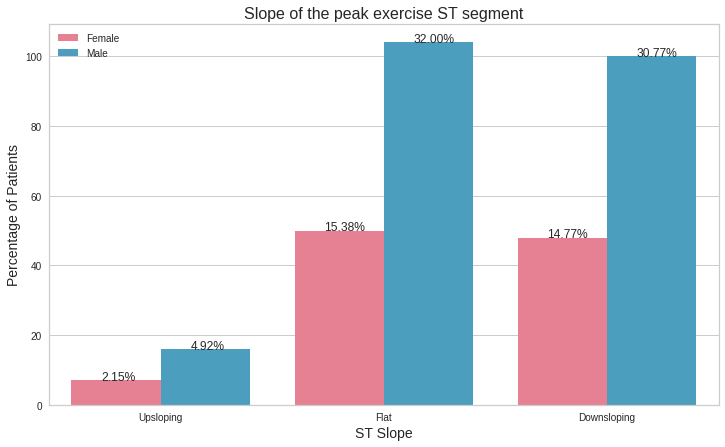

In [ ]:
figure = plt.figure(figsize= [12,7])

ax = sns.countplot(x = 'st_slope', hue = 'sex', data = data, palette = ['#F67088', '#38A7D0'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x,y))

plt.xlabel('ST Slope', size= 14)
plt.xticks(ticks = [0,1,2], labels = ['Upsloping', 'Flat', 'Downsloping'], rotation = 0)
plt.ylabel('Percentage of Patients', size= 14)
plt.legend(labels = ['Female', 'Male'])
plt.title('Slope of the peak exercise ST segment', size =16)
plt.show()

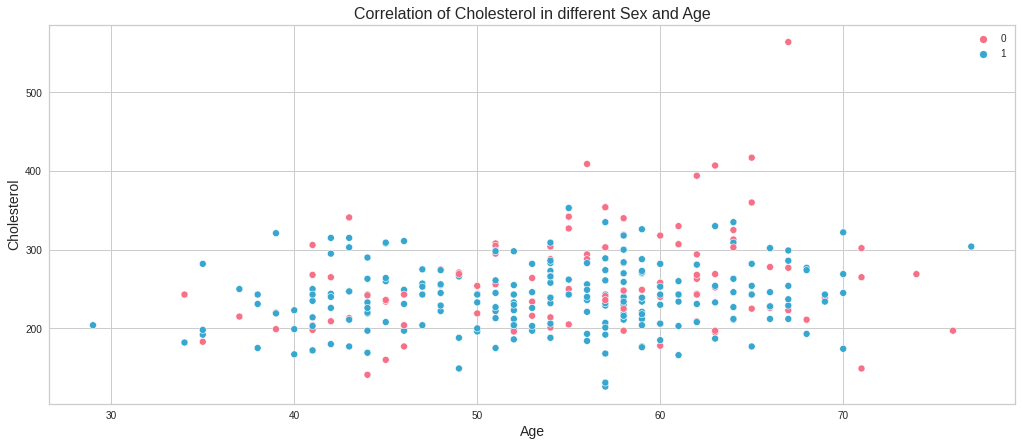

In [ ]:
# Question 7: What is the association of cholestrol with age based on the sex of patients?
# Note: Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults.

figure = plt.figure(figsize = [15,7])
sns.scatterplot(x = 'age', y = 'cholesterol', hue = 'sex', data = data, palette = ['#F67088', '#38A7D0'])
plt.xlabel('Age', size=14)
plt.ylabel('Cholesterol', size=14)
plt.title('Correlation of Cholesterol in different Sex and Age', size= 16)
plt.legend()
plt.tight_layout(pad = 3.0)
plt.show()

Observations:
1) Both male and female patients seem to have similar cholesterol levels upto 60 years.
2) Some female patients above 60 years have higher cholesterol than male patients of the same age.



7. Post Data Processing & Feature Selection.

1) In this part we will perform encoding over categorical features and feed it to the Random Forest because machines can't understand human language.

2) Random Forest will then identify important features for our model using threshold over the information gain over reduction in impurity.

3) As we can see most of the features are already encoded, we need to encode only chest_pain_type feature.

4) And finally we will split our data for the model development.

In [ ]:
# Encoding Categorical Features - In this part we will perform transformation of categorical features to numeric using get_dummies()

In [ ]:
# Before Transformation
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,typical angina,120,354.0,0,1,163.0,1,0.6,2,0,2,1


Observation: We can see chest_pain_type contains categorical labels.

In [ ]:
# Performing Operations:
data = pd.get_dummies(data = data, columns = ['chest_pain_type'])

In [ ]:
# After Transformation
data.head(2)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,63,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1,1,0,0,0
1,37,1,130,250.0,0,1,187.0,0,3.5,0,0,2,1,0,0,1,0


Observation: We have successfully transformed the categorical data to numeric.

7.2 Feature Selection using Random Forest

1) Now in real world, it is very rare that all the features are important while developing the model.
2) So instead we analyze the impact of input over the target, either done by performing statistical tests or by using Random Forest.
3) This interpretability is derived from the importance of each feature on the tree decision.
4) In other words, it is easy to compute how much each feature is contributing to the decision.

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Extracting important features
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1))
selector.fit(X,y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature imporatnce
print('Threshold set by Model:', np.round(selector.threshold_, decimals= 2))
print('Features:', selected_feat)

Total Features Selected are 8
Threshold set by Model: 0.06
Features: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'thalassemia', 'chest_pain_type_typical angina']


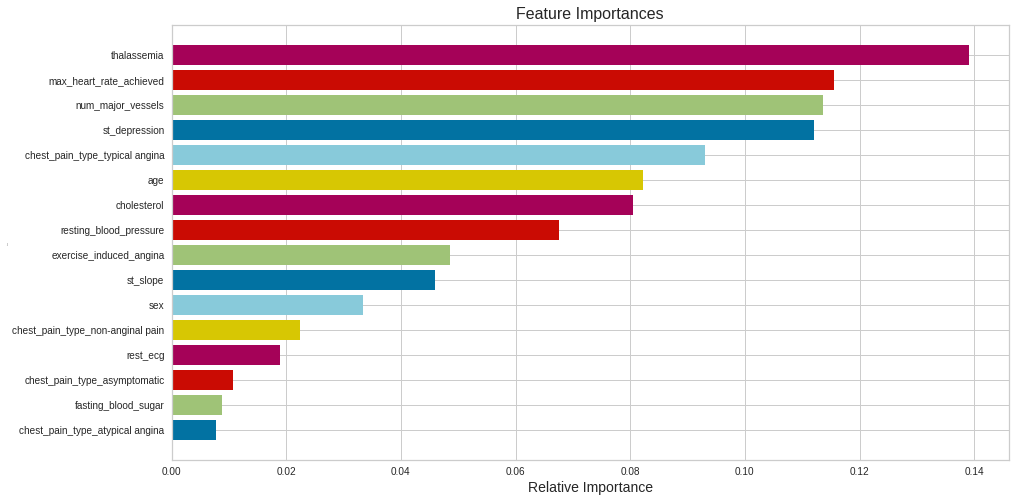

In [ ]:
# Visualization of Important features - Below features are plotted against their relative importance (in %age), of each feature.

figure = plt.figure(figsize = [15,8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X,y)

plt.xlabel('Relative Importance', size =14)
plt.ylabel('Features', size=.14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [ ]:
# Data Preparation - Now we will split or data in training and testing part for further development.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (260, 16) (260,)
Testing Data Shape: (65, 16) (65,)


Model Development & Evaluation.

1) In this section we will develop different models using only important feature as marked important by Random Forest.
2) Then we will compare the results obtained from them and make our observation.
3) For evaluation purpose, we will plot precision and recall for each estimator for which we have made a custom function below.
4) Remember that we want generalize results i.e same results or error in testing data as that of training data.
5) At the end we will tune our models if required.

In [ ]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  """
  y_true: Actual values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot average values "precision" or "recall"
  train_or_test: Train Data or Test Data
  """

  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0,1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0,1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
  plt.yticks(ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
  plt.ylabel('Precision', fontsize= 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP{:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)



In [ ]:
# Essential Feature Models - Logisitc Regression
log = LogisticRegression(random_state= 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)

logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('         Training Report       ')
print(logistic_report_train)
print('         Testing Report        ')
print(logistic_report_test)

         Training Report       
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       121
           1       0.82      0.93      0.87       139

    accuracy                           0.85       260
   macro avg       0.86      0.85      0.85       260
weighted avg       0.86      0.85      0.85       260

         Testing Report        
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.92      0.97      0.94        35

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.94        65
weighted avg       0.94      0.94      0.94        65



TypeError: ignored

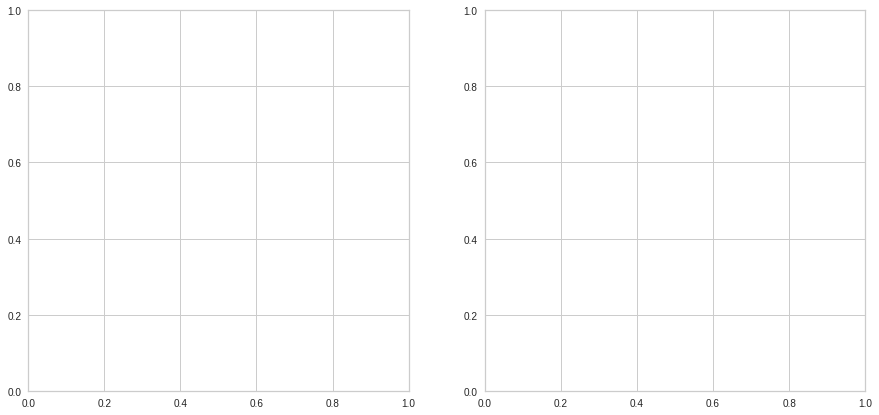

In [ ]:
# Confusion Matrix
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols= 2, sharex = False, figsize = (15,7))
ConfusionMatrixDisplay(estimator = log, X = X_train, y_true= y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
ConfusionMatrixDisplay(estimator = log, X= X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t= 'Confusion Matrix', size = 16)
plt.show()

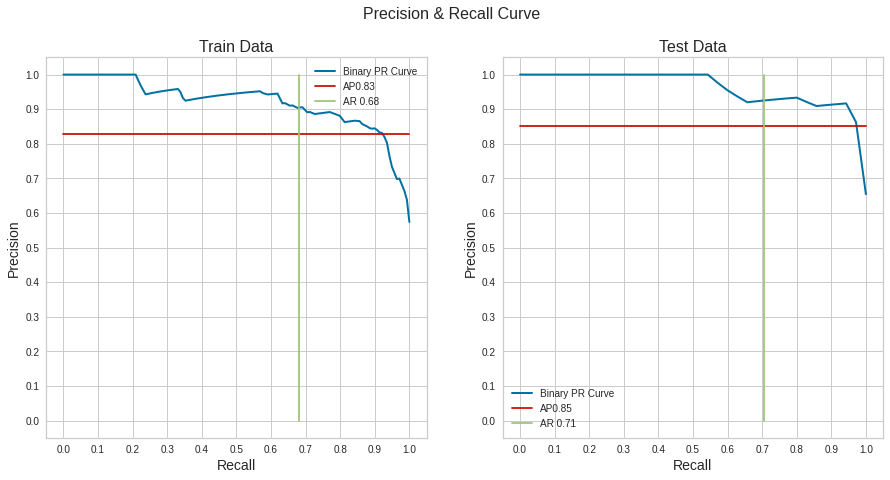

In [ ]:
# NOTE: This precision and recall have been plotted only for positive class i.e. patient has heart disease.

figure = plt.figure(figsize= [15,7])
plt.subplot(1,2,1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test = 'Train Data')

plt.subplot(1,2,2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:,1], train_or_test = 'Test Data')

plt.suptitle("Precision & Recall Curve", size =16)
plt.show()

In [ ]:
# Support Vector Classifier
svc_clf = SVC(random_state = 42, probability = True)
svc_clf.fit(X_train, y_train)

y_train_pred_count = svc_clf.predict(X_train)
y_test_pred_count = svc_clf.predict(X_test)

y_train_pred_proba = svc_clf.predict(X_train)
y_test_pred_proba = svc_clf.predict(X_test)

svc_report_train = classification_report(y_train, y_train_pred_count)
svc_report_test = classification_report(y_test, y_test_pred_count)

print('         Training Report       ')
print(svc_report_train)
print('         Testing Report        ')
print(svc_report_test)

         Training Report       
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       121
           1       0.63      0.84      0.72       139

    accuracy                           0.65       260
   macro avg       0.67      0.64      0.63       260
weighted avg       0.67      0.65      0.64       260

         Testing Report        
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.69      0.89      0.78        35

    accuracy                           0.72        65
   macro avg       0.74      0.71      0.71        65
weighted avg       0.74      0.72      0.71        65



**Observation**

1) Accuracy for training data is low as compared to testing data which is even worse than logistic regression.
2) Similar is the case with Precision and recall for training and testing data.

NameError: ignored

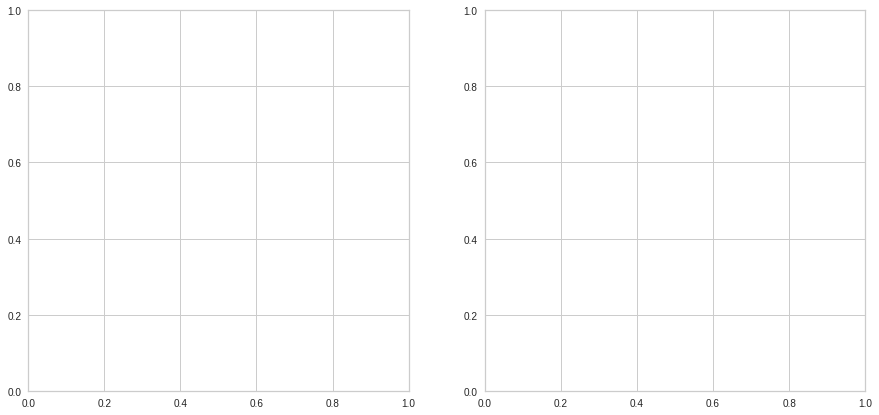

In [ ]:
# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False,figsize=(15,7))
plot_confusion_matrix(estimator = svc_clf, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = svc_clf, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_tilei(label = 'Test Data', size= 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

IndexError: ignored

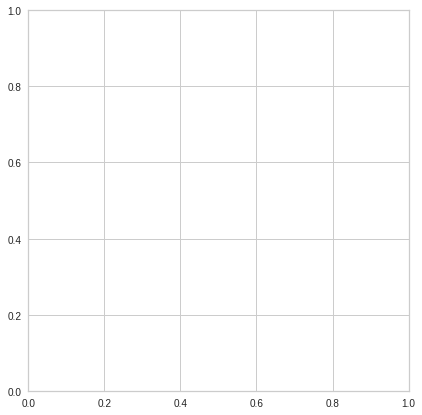

In [ ]:
# Note: This precision and recall have been plotted only for positive class i.e. patient has heart disease.

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('         Training Report         ')
print(rfc_report_train)
print('         Testing Report          ')
print(rfc_report_test)

         Training Report         
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       139

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

         Testing Report          
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.81      0.86      0.83        35

    accuracy                           0.82        65
   macro avg       0.82      0.81      0.81        65
weighted avg       0.82      0.82      0.81        65



Observation:

1) Accuracy for training data is high as compared to testing data signifying overfitting over train data.
2) But our accuracy on test has increased over rest models.
3) Similar is the case with Precision and recall for training data and testing data.
4) It shows that Random Forest worked better than other models, which will tune in upcoming session.

Fine Tuning of Model.
1) Random Forest worked better than rest of the models.
2) Tuning the model takes extensive work, so we will be working out with few parameters instead of large combinations.
3) Now that we know that Random Forest performed better than any other model, we will fine tune it.
4) For that we will implement Grid Search CV to find optimal setting for the model.
5) Note: We want generalize results i.e same precision and recall on test data as that of train data.


In [ ]:
parameter_grid = [{'n_estimators' : [100, 200, 300, 400, 500], 'criterion':['gini','entropy'], 'max_depth' : [x for x in range(2,10)], 'bootstrap' : [True, False]}]

In [ ]:
rand_forest = RandomForestClassifier(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = parameter_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       n_jobs=-1, random_state=42)

In [ ]:
random_forest.best_params_

In [ ]:
pd.DataFrame(random_search.cv_results)

In [ ]:
# Final Model
rfc = random_search.best_estimator_
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test =  classification_report(y_test, y_test_pred_count)
print('         Training Report     ')
print(rfc_report_train)
print('         Testing Report      ')
print(rfc_report_test)

Observation:
We can see that from than the Random Forest without optimization was overfitting over the training data at 100%.
But now the generalization error is very close to the training error.